In [30]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [31]:
# 配置 前20张图片用于测试，后80张图片用于训练
# 训练图片数量
train_num = 80
# 测试图片数量
test_num = 20

In [32]:
# 训练结果字典
result = {}

In [33]:
# 图片模块化
def img_to_module(img_dir):
    img = cv2.imread(img_dir)
    # 转为灰度图片单通道
#     plt.imshow(img,cmap="gray")
    img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#         plt.imshow(img_gray,cmap="gray")
    img_module = np.zeros([28,28],dtype=np.uint8)
    for i in range(0,14):
        for j in range(0,14):
            count = 0
            for k in range(0,2):
                for g in range(0,2):
                    if img_gray[i*2+k,j*2+g] > 127:
                        count += 1
            for k in range(0,2):
                for g in range(0,2):
                    if count > 1:
                        img_module[i*2+k,j*2+g] = 255
                    else:
                        img_module[i*2+k,j*2+g] = 0
    return img_module

In [34]:
# 模块化图片变字符串
def module_to_sqe(module):
    char_sqe = []
    for i in range(0,28):
        for j in range(0,28):
            if module[i,j]==255:
                char_sqe.append(1)
            else:
                char_sqe.append(0)    
    return char_sqe

In [35]:
# 预测图片数字
def forecast_img(test_char_sqe):
    forecast = {}
    for laber in range(0,10):
        for number in range(20,train_num):
            num = 0
            char_sqe = result[str(laber)+'_'+str(number)]
            for i in range(0,28*28):
                num += np.square(char_sqe[i]-test_char_sqe[i])
            forecast[str(laber)+'_'+str(number)] = np.sqrt(num)
    forecast_laber = 0
    forecast_number = 0
    min_num = 9999
    for laber in range(0,10):
        for number in range(20,train_num):
            if forecast[str(laber)+'_'+str(number)] < min_num:
                min_num = forecast[str(laber)+'_'+str(number)]
                forecast_laber = laber
                forecast_number = number
#     print("预测其与"+str(forecast_laber)+"_"+str(forecast_number)+"最相似，其值为:"+str(min_num))
#     print("预测数字为:"+str(forecast_laber))  
    return forecast_laber

In [36]:
# 训练图片生成结果保存到result中
for laber in range(0,10):
    for number in range(20,train_num):
        img_dir = 'G:\手写数字数据集\train-images\{0}_{1}.bmp'.format(laber,number)
        img_module = img_to_module(img_dir)
        char_sqe = module_to_sqe(img_module)
        result[str(laber)+'_'+str(number)] = char_sqe

In [37]:
# print(result)

{'0_20': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 

In [8]:
laber_acc = {}
for laber in range(0,10):
    count = 0
    for number in range(0,test_num):
        test_img_dir = '/media/cj/还没想好/手写数字数据集/test-images/{0}_{1}.bmp'.format(laber,number)
        test_img_module = img_to_module(test_img_dir)
        # plt.imshow(test_img_module,cmap="gray")
        test_char_sqe = module_to_sqe(test_img_module)
        f_num = forecast_img(test_char_sqe)
        if f_num == laber:
            count += 1
    laber_acc[laber] = str((count/test_num)*100)+ '%'
print(laber_acc)

{0: '100.0%', 1: '100.0%', 2: '75.0%', 3: '85.0%', 4: '85.0%', 5: '75.0%', 6: '100.0%', 7: '90.0%', 8: '55.00000000000001%', 9: '80.0%'}


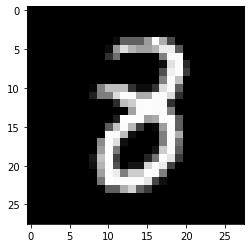

In [44]:
img_ex_dir = '/media/cj/还没想好/手写数字数据集/train-images/8_9.bmp'
img_ex = cv2.imread(img_ex_dir)
plt.imshow(img_ex)

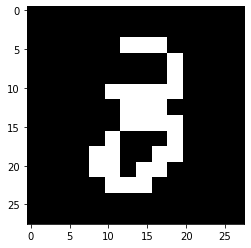

In [45]:
img_ex_module = img_to_module(img_ex_dir)
plt.imshow(img_ex_module,cmap="gray")

In [ ]:
img_char_sqe = module_to_sqe(img_ex_module)
print(img_char_sqe)

In [47]:
forecast_num = forecast_img(img_char_sqe)
print(forecast_num)

8
